
# Data’re coming from :
# [Apple Quality - Explore the World of Fruits](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality?resource=download)

In [121]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [122]:
df = pd.read_csv("../data/apple_quality.csv")
# Drop Credits
df.drop([4000],axis=0, inplace=True)
df["Acidity"] = df["Acidity"].astype(float)
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [33]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [34]:
#df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 4000 entries, 0 to 3999

Data columns (total 9 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   A_id         4000 non-null   float64

 1   Size         4000 non-null   float64

 2   Weight       4000 non-null   float64

 3   Sweetness    4000 non-null   float64

 4   Crunchiness  4000 non-null   float64

 5   Juiciness    4000 non-null   float64

 6   Ripeness     4000 non-null   float64

 7   Acidity      4000 non-null   float64

 8   Quality      4000 non-null   object 

dtypes: float64(8), object(1)

memory usage: 281.4+ KB


In [129]:
X, y = df.iloc[:, 1:-1], df[["Quality"]]
X.shape, y.shape

((4000, 7), (4000, 1))

In [130]:
# Classes are balanced
y.value_counts()

Quality
good       2004
bad        1996
Name: count, dtype: int64

In [132]:
# Liste des catégories suivant ou non une loi normale pour les targets 0.
normality_test_0 = stats.normaltest(X.loc[y["Quality"] == "bad"], axis=0)
for it, pvalue in enumerate(list(normality_test_0.pvalue)):
    if pvalue < 0.05:
        print(X.columns[it] + " -> Normal distribution" )
    else:
        print(X.columns[it] + " -> Not Normal distribution" )


Size -> Not Normal distribution

Weight -> Not Normal distribution

Sweetness -> Not Normal distribution

Crunchiness -> Normal distribution

Juiciness -> Not Normal distribution

Ripeness -> Not Normal distribution

Acidity -> Normal distribution


In [133]:
# Liste des catégories suivant ou non une loi normale pour les targets 1.
normality_test_1 = stats.normaltest(X.loc[y["Quality"] == "good"], axis=0)
cols_norm = []
cols_not_norm = []
for it, pvalue in enumerate(list(normality_test_1.pvalue)):
    if pvalue < 0.05:
        print(X.columns[it] + " -> Normal distribution" )
    else:
        print(X.columns[it] + " -> Not Normal distribution" )


Size -> Normal distribution

Weight -> Not Normal distribution

Sweetness -> Normal distribution

Crunchiness -> Normal distribution

Juiciness -> Not Normal distribution

Ripeness -> Not Normal distribution

Acidity -> Not Normal distribution


In [135]:
# Les catégories suivant pas une loi normale
arrays_0 = []
arrays_1 = []
for it, col in enumerate(["Crunchiness"]):
    arrays_0.append(np.array(X.iloc[:,it].loc[y["Quality"]=="bad"].values.flatten()))
    arrays_1.append(np.array(X.iloc[:,it].loc[y["Quality"]=="good"].values.flatten()))
    # La variance de la variable Crunchiness est la même dans les 2 groupes
    bartlett_test = stats.bartlett(*arrays_0, *arrays_1)
    print(col, " : ", bartlett_test.pvalue)

Crunchiness  :  4.523689796590748e-07


In [134]:
# Le poids et le croquant sont indépendants
pvalues = []
for col in ["Crunchiness"]:
    test = stats.ttest_ind(np.array(X[[col]].loc[y["Quality"]=="bad"].values.flatten()), np.array(X[[col]].loc[y["Quality"]=="good"][:1996].values.flatten()))
    pvalues.append(test.pvalue)
    if test.pvalue <= 0.05:
        print(col, " \t\t-> H1 accepted, H0 rejected")
    else:
        print(col, " \t\t-> H1 rejected, H0 accepted")
# Crunchness n’a pas de différence de moyenne entre les bonnes et les mauvaises pommes

Crunchiness  		-> H1 rejected, H0 accepted


In [136]:
# Les catégories ne suivant pas une loi normale
arrays_0 = []
arrays_1 = []
cols = ["Size", "Weight", "Sweetness", "Juiciness", "Ripeness", "Acidity"]
for it, col in enumerate(cols):
    arrays_0.append(np.array(X.iloc[:,it].loc[y["Quality"]=="bad"].values.flatten()))
    arrays_1.append(np.array(X.iloc[:,it].loc[y["Quality"]=="good"].values.flatten()))
    # La variance de la variable est la même dans tous les couples de catégorie
    levene_test = stats.levene(*arrays_0, *arrays_1)
    print(col, " : ", levene_test.pvalue)

Size  :  6.250011355943806e-07

Weight  :  5.044514482336389e-65

Sweetness  :  3.097018435451572e-67

Juiciness  :  7.071115108911903e-156

Ripeness  :  1.556389012626723e-177

Acidity  :  1.0426285463322888e-180


In [137]:
# Le poids et le croquant sont indépendants
pvalues = []
for col in cols:
    test = stats.wilcoxon(np.array(X[[col]].loc[y["Quality"]=="bad"].values.flatten()), np.array(X[[col]].loc[y["Quality"]=="good"][:1996].values.flatten()))
    pvalues.append(test.pvalue)
    if test.pvalue <= 0.05:
        print(col, " \t\t-> H1 accepted, H0 rejected")
    else:
        print(col, " \t\t-> H1 rejected, H0 accepted")
    # Weight et Acidity n’ont pas de différence de moyenne entre bonne et mauvaise pomme
    # Size, Sweetness, Juiciness et Ripeness ont une différence de moyenne entre bonne et mauvaise pomme.

Size  		-> H1 accepted, H0 rejected

Weight  		-> H1 rejected, H0 accepted

Sweetness  		-> H1 accepted, H0 rejected

Juiciness  		-> H1 accepted, H0 rejected

Ripeness  		-> H1 accepted, H0 rejected

Acidity  		-> H1 rejected, H0 accepted


In [138]:
cols = ["Size", "Sweetness", "Juiciness", "Ripeness"]

test = stats.f_oneway(np.array(X[cols].loc[y["Quality"]=="bad"].values.flatten()), np.array(X[cols].loc[y["Quality"]=="good"].values.flatten()))
pvalues.append(test.pvalue)
if test.pvalue <= 0.05:
    print(test.pvalue)
    print(*cols, " \t\t-> H1 accepted, H0 rejected")
else:
    print(*cols, " \t\t-> H1 rejected, H0 accepted")
# One-way ANOVA montre que les groupes ont bien des moyennes différentes entre bonne et mauvaise pomme.

7.290456021457005e-54

Size Sweetness Juiciness Ripeness  		-> H1 accepted, H0 rejected


In [139]:
# PCA
# Scree Plot

In [140]:
# Data Scaling
x_scaled = StandardScaler().fit_transform(X[cols])

# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=4)

# Fit and transform data
pca_features = pca.fit_transform(x_scaled)

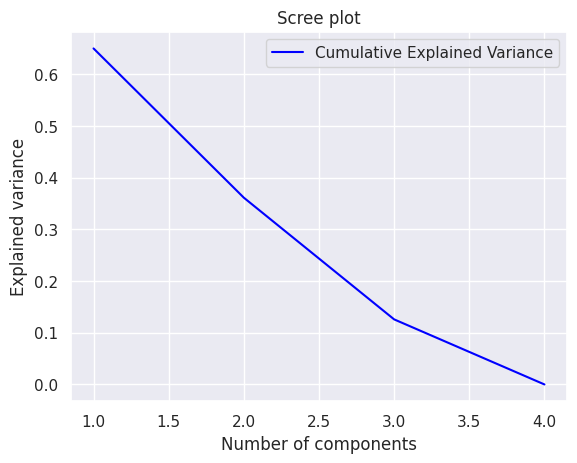

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(
    range(1,len(pca.explained_variance_ratio_ )+1),
    np.sum(pca.explained_variance_ratio_) - np.cumsum(pca.explained_variance_ratio_),
    c='blue',
    label='Cumulative Explained Variance')

plt.legend(loc='upper right')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree plot')

plt.show()

In [144]:
# Transform categorical to binary class
y = pd.get_dummies(y).drop("Quality_bad", axis=1).rename(columns={"Quality_good":"Quality"})

In [146]:
cols

['Size', 'Sweetness', 'Juiciness', 'Ripeness']

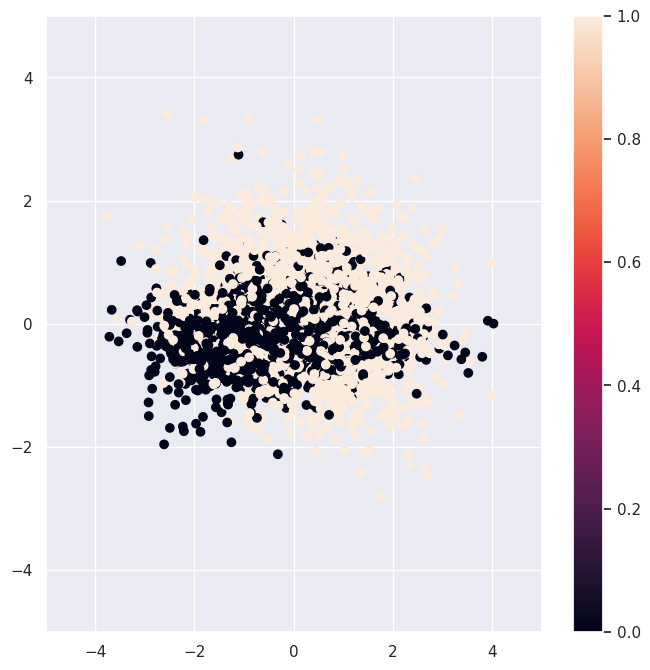

In [147]:
X_projected = pca.transform(x_scaled)
figure = plt.figure(figsize=(8, 8))
# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 3], # Weight by Crunchiness
            c=y.get("Quality"))

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.colorbar()

In [150]:
def acp_graph(pca, comp_x, comp_y, X):
    pcs = pca.components_
    figure = plt.figure(figsize=(8, 8))

    for i, (x, y) in enumerate(zip(pcs[comp_x, :], pcs[comp_y, :])):
        # Afficher un segment de l'origine au point (x, y)
        plt.plot([0, x], [0, y], color='k', )
        # Afficher le nom (data.columns[i]) de la performance
        plt.text(x, y, cols[i], fontsize='11')

    # Afficher une ligne horizontale y=0
    plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

    # Afficher une ligne verticale x=0
    plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

    plt.xlim(-0.75, 0.75)
    plt.ylim(-0.75, 0.75)

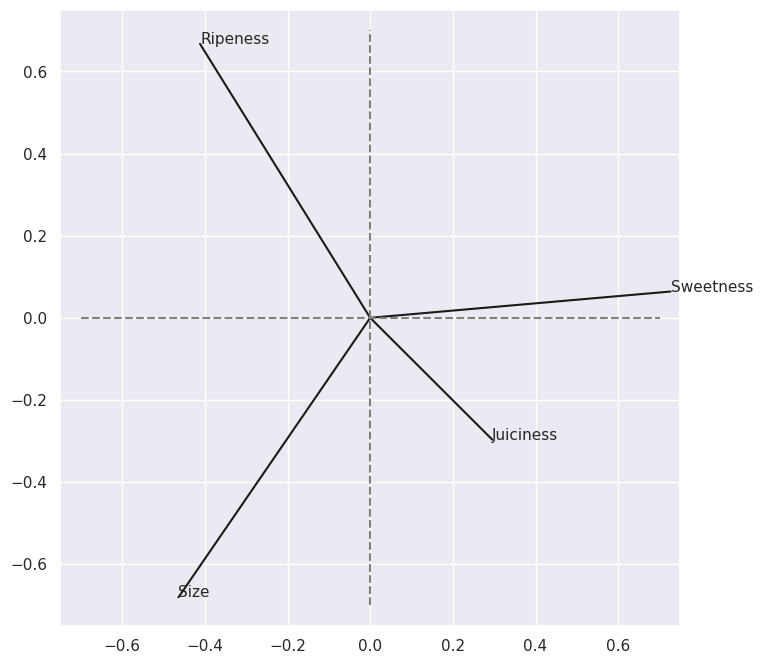

In [151]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(x_scaled)
acp_graph(pca, 0, 1, X)

Nous voyons que les variables, à l’exception du Juiciness sont proches du cercle de corrélation et donc très bien représentées sur le mapping.

Le premier axe représente bien la Sweetness.

Les deux axes représentent le Ripeness et la Size et Juiciness dans une moindre mesure.

La Size est perpendiculaire, donc indépendante de Ripeness et Juiciness, sur le mapping.

In [162]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
estimators = [('reduce_dim', PCA()), ('clf', GradientBoostingClassifier(random_state=42))]
cachedir = mkdtemp()
pipe = Pipeline(estimators, memory=cachedir)
pipe.set_params()
# Clear the cache directory when you don't need it anymore
rmtree(cachedir)
param_grid = {'reduce_dim__n_components': [2,3,4],
              'clf__loss': ['log_loss', 'exponential'],
              'clf__learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.75],
              'clf__n_estimators': [100, 250, 350, 600, 800],
              'clf__subsample': [0.4, 0.8, 1.0],
              'clf__criterion': ['friedman_mse', 'squarred_error'],
              'clf__max_depth': [3, 5, 10],
              'clf__min_samples_split': [2, 6, 12],
              'clf__min_samples_leaf': [0.125, 0.25, 0.5],
              'clf__min_weight_fraction_leaf': [0.125, 0.25, 0.375, 0.5],
              }
#X, y = make_classification(n_samples=1000, random_state=0)
clf = RandomizedSearchCV(pipe, param_grid, cv=5,
                         scoring=["recall"],refit="recall").fit(X, y.to_numpy().ravel())
clf.best_estimator_

/home/romain/Documents/Venv/TensorFlow/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 

20 fits failed out of a total of 50.

The score on these train-test partitions for these parameters will be set to nan.

If these failures are not expected, you can try to debug them by setting error_score='raise'.



Below are more details about the failures:

--------------------------------------------------------------------------------

20 fits failed with the following error:

Traceback (most recent call last):

  File "/home/romain/Documents/Venv/TensorFlow/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score

    estimator.fit(X_train, y_train, **fit_params)

  File "/home/romain/Documents/Venv/TensorFlow/lib/python3.10/site-packages/sklearn/base.py", line 1351, in wrapper

    return fit_method(estimator, *args, **kwargs)

  File "/home/romain/Documents/Venv/TensorFlow/lib/python3.10/site-packages/sklea

Pipeline(memory='/tmp/tmpnl220xi9',
         steps=[('reduce_dim', PCA(n_components=3)),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=10,
                                            min_samples_leaf=0.5,
                                            min_samples_split=6,
                                            min_weight_fraction_leaf=0.125,
                                            n_estimators=600, random_state=42,
                                            subsample=0.4))])

In [163]:
# Modèle de base
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('reduce_dim', PCA()), ('clf', GradientBoostingClassifier())])
pipe.fit(X_train, y_train)

/home/romain/Documents/Venv/TensorFlow/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, warn=True)


Pipeline(steps=[('reduce_dim', PCA()), ('clf', GradientBoostingClassifier())])

In [164]:
clf.score(X_test, y_test), pipe.score(X_test, y_test)

(1.0, 0.869)

In [ ]:
# Notre modèle fonctionne parfaitement avec un score de 100, en comparaison d’un modèle sans réglage